In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/raw_osteoporosis_data.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [4]:
#Data Cleaning
df.rename(columns = {'Id': 'id', 'Age': 'age', 'Gender': 'gender', 
                     'Hormonal Changes': 'hormonal_changes', 'Family History': 'family_history', 
                    'Race/Ethnicity': 'race', 'Body Weight': 'body_weight', 'Calcium Intake': 'calcium', 
                     'Vitamin D Intake': 'vitamin_d', 'Physical Activity': 'physical_activity', 'Smoking': 'smoking', 
                    'Alcohol Consumption': 'alcohol_consumption', 'Medical Conditions': 'medical_condition', 
                     'Medications': 'medications', 'Prior Fractures': 'prior_fracture', 'Osteoporosis': 'osteoporosis'}, inplace = True)

In [5]:
df.isnull().sum()

# Alcohol Consumption, Medical Conditions and Medications have null values

id                       0
age                      0
gender                   0
hormonal_changes         0
family_history           0
race                     0
body_weight              0
calcium                  0
vitamin_d                0
physical_activity        0
smoking                  0
alcohol_consumption    988
medical_condition      647
medications            985
prior_fracture           0
osteoporosis             0
dtype: int64

In [6]:
df['alcohol_consumption'] = df['alcohol_consumption'].fillna('None')
df['medical_condition'] = df['medical_condition'].fillna('None')
df['medications'] = df['medications'].fillna('None')

In [7]:
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())
    print("\n")

gender
Male      992
Female    966
Name: count, dtype: int64


hormonal_changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64


family_history
No     998
Yes    960
Name: count, dtype: int64


race
African American    681
Caucasian           646
Asian               631
Name: count, dtype: int64


body_weight
Normal         1027
Underweight     931
Name: count, dtype: int64


calcium
Low         1004
Adequate     954
Name: count, dtype: int64


vitamin_d
Sufficient      1011
Insufficient     947
Name: count, dtype: int64


physical_activity
Active       1021
Sedentary     937
Name: count, dtype: int64


smoking
Yes    982
No     976
Name: count, dtype: int64


alcohol_consumption
None        988
Moderate    970
Name: count, dtype: int64


medical_condition
Hyperthyroidism         678
None                    647
Rheumatoid Arthritis    633
Name: count, dtype: int64


medications
None               985
Corticosteroids    973
Name: count, dtype: int64


prior_fractu

In [8]:
df['age'].describe()

count    1958.000000
mean       39.101124
std        21.355424
min        18.000000
25%        21.000000
50%        32.000000
75%        53.000000
max        90.000000
Name: age, dtype: float64

In [9]:
df.head()

,id,age,gender,hormonal_changes,family_history,race,body_weight,calcium,vitamin_d,physical_activity,smoking,alcohol_consumption,medical_condition,medications,prior_fracture,osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


Text(0.5, 0, 'Age')

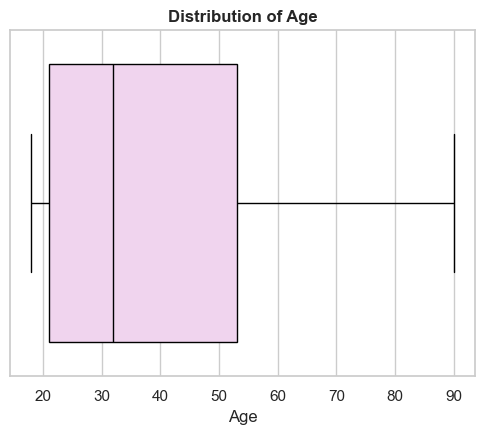

In [64]:
# Exploratory Data Analysis
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))

sns.boxplot(
    x = df['age'],
    color = '#F4D0F2',
    linewidth = 1,
    boxprops = dict(edgecolor = "black"),
    whiskerprops = dict(color = "black"),
    capprops = dict(color = "black"),
    medianprops = dict(color = "black"),
    flierprops = dict(markerfacecolor = "black", marker = 'o')
    
)

plt.title('Distribution of Age', weight = 'bold')
plt.xlabel('Age')

Text(0, 0.5, 'Age')

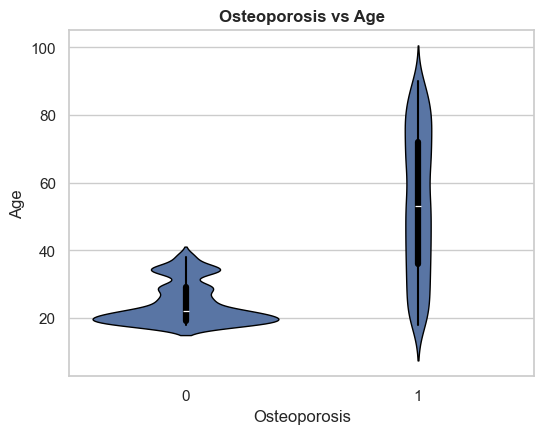

In [66]:
plt.figure(figsize = (6, 4.5))

sns.violinplot(x = 'osteoporosis', y = 'age', data = df, linewidth = 1, edgecolor = 'Black')
plt.title('Osteoporosis vs Age', weight = 'bold')
plt.xlabel('Osteoporosis')
plt.ylabel('Age')

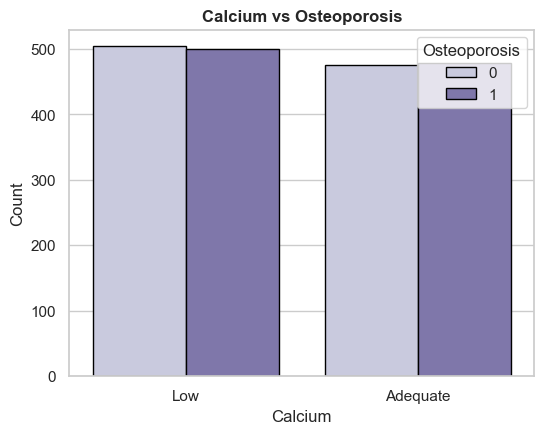

In [48]:
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))

sns.countplot(df, x = 'calcium', hue = 'osteoporosis', palette = 'Purples', linewidth = 1, edgecolor = 'black')
plt.title('Calcium vs Osteoporosis', weight = 'bold')
plt.xlabel('Calcium')
plt.ylabel('Count')
plt.legend(title = 'Osteoporosis')

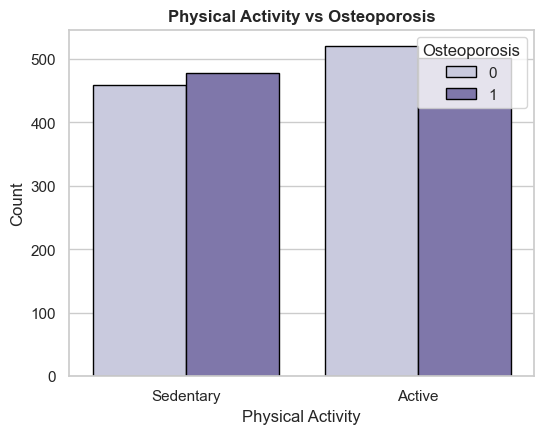

In [50]:
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))

sns.countplot(df, x = 'physical_activity', hue = 'osteoporosis', palette = 'Purples', linewidth = 1, edgecolor = 'black')
plt.title('Physical Activity vs Osteoporosis', weight = 'bold')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.legend(title = 'Osteoporosis')

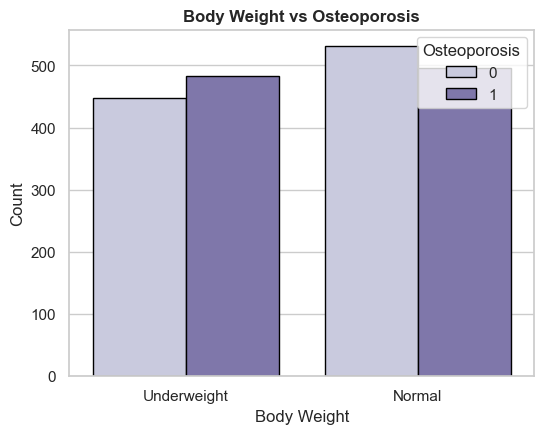

In [54]:
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))

sns.countplot(df, x = 'body_weight', hue = 'osteoporosis', palette = 'Purples', linewidth = 1, edgecolor = 'black')
plt.title('Body Weight vs Osteoporosis', weight = 'bold')
plt.xlabel('Body Weight')
plt.ylabel('Count')
plt.legend(title = 'Osteoporosis')

In [60]:
print("Body Weight vs Osteoporosis")
(df.groupby('body_weight')['osteoporosis'].value_counts(normalize = True).unstack() * 100).round(1).astype(str) + '%'

Body Weight vs Osteoporosis


osteoporosis,0,1
body_weight,,
Normal,51.7%,48.3%
Underweight,48.1%,51.9%
